# Problem Statement :- Implementation of Twitter Sentiment Analysis using LSTM-RNN



# LSTM-RNN
Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) architecture. LSTMs are designed to overcome the limitations of traditional RNNs in capturing and retaining long-term dependencies in sequential data. RNNs, in general, have difficulties learning from and preserving information over extended sequences due to the vanishing gradient problem. LSTMs address this issue through the incorporation of memory cells and gating mechanisms, allowing them to selectively update, retain, or forget information. This makes LSTMs particularly effective in tasks requiring the modeling of intricate temporal relationships, such as natural language processing, speech recognition, and time series analysis.







# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer # Used for converting a collection of text documents to a matrix of token counts.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences # Keras preprocessing
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical # Converts a class vector (integers) to binary class matrix (one-hot encoding)
import re

# Importing Dataset

**Dataset Used : First GOP Debate Twitter Sentiment**

Link of dataset:- https://www.kaggle.com/datasets/crowdflower/first-gop-debate-twitter-sentiment

The First GOP Debate Twitter Sentiment dataset is a collection of 14,000 tweets related to the 2015 Republican presidential primary debate. The dataset includes annotations for the relevance of each tweet, the candidates mentioned, the topic of the tweet, and the overall sentiment of the tweet. The dataset is a valuable resource for researchers interested in sentiment analysis, social media, and political communication.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sentiment.csv to Sentiment.csv


In [ ]:
data = pd.read_csv('Sentiment.csv')

In [ ]:
data = data[['sentiment', 'text']]

In [ ]:
data.head()

,sentiment,text
1,Positive,rt scottwalker didnt catch the full gopdebate ...
3,Positive,rt robgeorge that carly fiorina is trending h...
4,Positive,rt danscavino gopdebate w realdonaldtrump deli...
5,Positive,rt gregabbott_tx tedcruz on my first day i wil...
6,Negative,rt warriorwoman91 i liked her and was happy wh...


# Data Preprocessing





**Filtering Neutral Data:** Removes instances labeled as "Neutral" from the dataset.

**Lowercasing:** Converts all text in the 'text' column to lowercase for uniformity.

**Removing Non-Alphanumeric Characters:** Utilizes a regular expression to eliminate non-alphanumeric characters and symbols.

**Printing Size of Positive and Negative Instances:** Displays the count of 'Positive' and 'Negative' sentiment instances in the dataset.

**Removing 'rt' from Text:** Iterates through the data to replace occurrences of 'rt' (common in retweets) with spaces.

**Tokenization:** Uses Keras' Tokenizer to convert text data into sequences of integers.

**Padding Sequences:** Ensures consistent sequence lengths for effective model training.

In [ ]:
# removing neutral data
data = data[data.sentiment != "Neutral"]

# converts to lowercase and removing non-alphanumeric characters
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

# print size of positive and negative data
print("Positive Instances: ", data[ data['sentiment'] == 'Positive'].size)
print("Negative Instances: ", data[ data['sentiment'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

Positive Instances:  4472
Negative Instances:  16986


# Exploratory Data Analysis and Visualization

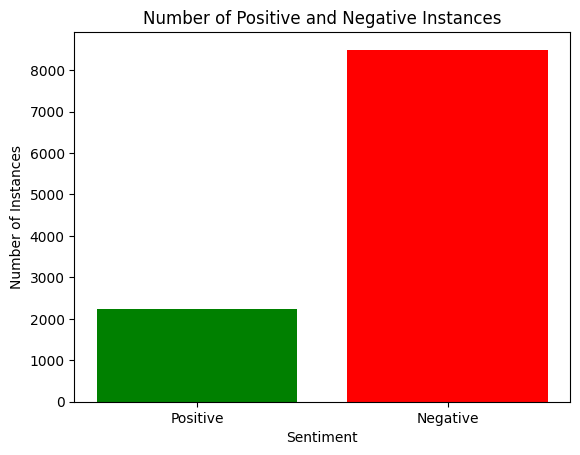

In [ ]:
# Bar plot
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'sentiment' column
positive_count = data[data['sentiment'] == 'Positive'].shape[0]
negative_count = data[data['sentiment'] == 'Negative'].shape[0]

# Data for the bar plot
sentiments = ['Positive', 'Negative']
counts = [positive_count, negative_count]

# Plotting the bar plot
plt.bar(sentiments, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Instances')
plt.title('Number of Positive and Negative Instances')
plt.show()

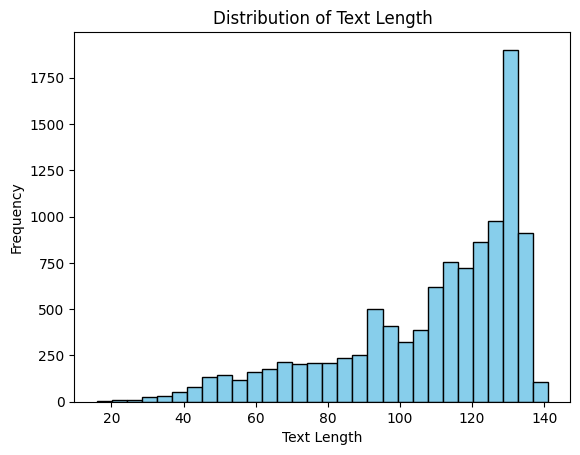

In [ ]:
# Histogram
plt.hist(data['text'].apply(len), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

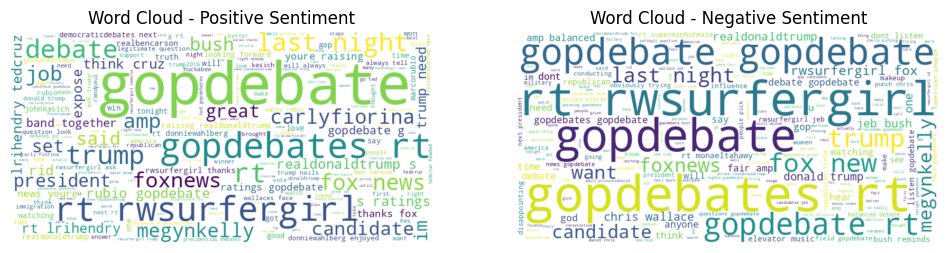

In [ ]:
from wordcloud import WordCloud
# Concatenate the text
positive_text = ' '.join(data[data['sentiment'] == 'Positive']['text'])
negative_text = ' '.join(data[data['sentiment'] == 'Negative']['text'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')

plt.show()

# Model Creation

The provided code builds a Keras neural network for text classification, featuring an embedding layer, spatial dropout for regularization, and an LSTM layer to capture sequence dependencies. The model employs softmax activation for binary classification and is compiled with categorical cross-entropy loss and the Adam optimizer. The printed summary provides a concise overview of the network's architecture and parameters, making it suitable for tasks like sentiment analysis. Ensure proper preprocessing of input data before training the model.

In [ ]:
embed_dim = 128 # Embedding layer
lstm_out = 196  # Spatial dropout layer/LSTM layer

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4)) #  Prevents overfitting
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)) # Captures long-term dependencies in sequences.
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d (Spatial  (None, 28, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 511194 (1.95 MB)
Trainable params: 511194 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Train-Test Split

Trainig Data : 70%
Testing Data : 30%

In [ ]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7510, 28) (7510, 2)
(3219, 28) (3219, 2)


# Model Training

In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 2)

Epoch 1/50
235/235 - 37s - loss: 0.1612 - accuracy: 0.9350 - 37s/epoch - 159ms/step
Epoch 2/50
235/235 - 35s - loss: 0.1485 - accuracy: 0.9370 - 35s/epoch - 149ms/step
Epoch 3/50
235/235 - 35s - loss: 0.1386 - accuracy: 0.9427 - 35s/epoch - 147ms/step
Epoch 4/50
235/235 - 36s - loss: 0.1264 - accuracy: 0.9465 - 36s/epoch - 151ms/step
Epoch 5/50
235/235 - 34s - loss: 0.1191 - accuracy: 0.9510 - 34s/epoch - 144ms/step
Epoch 6/50
235/235 - 34s - loss: 0.1109 - accuracy: 0.9526 - 34s/epoch - 147ms/step
Epoch 7/50
235/235 - 35s - loss: 0.1070 - accuracy: 0.9575 - 35s/epoch - 149ms/step
Epoch 8/50
235/235 - 33s - loss: 0.1062 - accuracy: 0.9569 - 33s/epoch - 142ms/step
Epoch 9/50
235/235 - 37s - loss: 0.0996 - accuracy: 0.9573 - 37s/epoch - 158ms/step
Epoch 10/50
235/235 - 34s - loss: 0.0938 - accuracy: 0.9605 - 34s/epoch - 146ms/step
Epoch 11/50
235/235 - 36s - loss: 0.0910 - accuracy: 0.9622 - 36s/epoch - 152ms/step
Epoch 12/50
235/235 - 33s - loss: 0.0923 - accuracy: 0.9618 - 33s/epoch - 

# Validation

In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
# separates a validation subset
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

# printing score and accuracy agter removing validation data from test data
print("Score: %.2f" % (score))
print("Accuracy: %.2f" % (acc))

54/54 - 1s - loss: 1.2023 - accuracy: 0.8150 - 1s/epoch - 25ms/step
Score: 1.20
Accuracy: 0.82


In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
    # checking if the predicted class index matches the true class index
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
    # counting total positive and negative samples
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

print("Positive accuracy: ", pos_correct/pos_cnt*100, "%")
print("Negative accuracy: ", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 294ms/epoch - 294ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 44ms/epoch - 44ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 35ms/epoch - 35ms/step
1/1 - 0s - 37ms/epoch - 37ms/step
1/1 - 0s - 36ms/epoch - 36ms/step
1/1 - 0s - 35ms/epoch - 35ms/step
1/1 - 0s - 3

# Prediction

In [ ]:
twt = ["This product is terrible. I regret buying it."]
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
#print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Negative")
elif (np.argmax(sentiment) == 1):
    print("Positive")

1/1 - 0s - 34ms/epoch - 34ms/step
Negative
